# Pronósticos, Round 2 - Parte 5: Neural Prophet

## 1. Introducción

Continuó con esta serie de pronósticos, con un quinto competidor *Neural Prophet*. Como su nombre lo indica es pariente de *Prophet* el modelo desarrollado por el equipo de inteligencia artificial de Facebook, y que ya utilice con gusto en el [primer round](https://gonzalezhomar.netlify.app/post/pronostico_3_prophet), y en este [segundo round](https://gonzalezhomar.netlify.app/post/pronr2_3prophet). Por tanto, al haber tenido el gusto de usar *Prophet* quise probar los resultados de este primo suyo.

Seguiré trabajando el problema planteado [en esta carrera](https://gonzalezhomar.netlify.app/post/pronr2_1sarimax). La *notebook* que acompaña a esta publicación se puede encontrar en mi repositorio de [Github](https://github.com/gonzalezhomar/articulos_pronosticos) o la pueden ver directamente [aquí](https://nbviewer.jupyter.org/github/gonzalezhomar/articulos_pronosticos/blob/main/PronR2_5.ipynb).

Debido a que no cuento con más tiempo para introducir nuevos competidores a esta carrera, aquí dejaré un resumen de los resultados hasta el momento:

## 2. *Neural Prophet* 

[*Neural Prophet*](https://github.com/ourownstory/neural_prophet) es un paquete desarrollado para mantener las mismas características que ya tiene *Prophet*: simplicidad de uso, posibilidad de añadir variables explicativas y fácil implementación. Me cruce con la existencia de este paquete en Medium [aquí](https://towardsdatascience.com/facebooks-prophet-deep-learning-neuralprophet-76796aed1d86), aunque me gustó más su implementación [aquí](https://towardsdatascience.com/how-to-use-facebooks-neuralprophet-and-why-it-s-so-powerful-136652d2da8b)

La principal diferencia entre *Prophet* y *Neural Prophet*, radica en que este último utiliza redes neuronales que permiten mejorar el pronóstico como son:
- Método de gradiente descendente para optimización basado en *PyTorch* en lugar del paquete estadístico *Stan* que es base de *Prophet*.
- Modela la autocorrelación de series de tiempo usando redes autoregresivas (*AR-Net*).
- Modela los regresores retrasados usando una red neuronal separada.
- Tiene capas internas no lineales (de la red neuronal) que son configurables.
- Se puede ajustar a horizontes específicos de pronóstico.
- Pérdidas y métricas personalizadas.

Por el lado de las desventajas, se pierde la ecuación modelo de *Prophet*, por lo cual *Neural Prophet* prácticamente se convierte en una caja negra. Si bien parece que hay gente trabajando en como explicar el módelo subyacente, de manera similar a como funciona [*Greykite*](https://gonzalezhomar.netlify.app/post/pronr2_4greykite), estos módelos son prácticamente imposibles de explicar. El trabajo que hacen las redes neuronales es aproximar el comportamiento observado de las funciones, pero sin una ecuación base para el modelo.

Finalmente, vale la pena señalar que [*Neural Prophet*](http://neuralprophet.com) aún se encuentra en versión beta, por lo que espero en un futuro probar sus actualizaciones. De hecho, al igual que *Greykite*, no se encuentra en conda, por lo que recomiendo crear su propio ambiente:

```python
conda create -n myenv
conda activate myenv
pip install neuralprophet
```

## 3. Series Mensuales

Otra vez comenzaré con la serie de IEPS de bebidas alcohólicas, para la cual presentaré el análisis completo y en el resto de las series sólo dejaré los resultados.

### 3.1 IEPS Bebidas Alcohólicas

Al usar *Neural Prophet* veo que los comandos para hacer el ajuste de la serie son completamente análogos a *Prophet* (me gustó la animación de como la red neural se va ajustando y al final queda una pequeña barra al 100%):

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from neuralprophet import NeuralProphet
#import plotly.offline as py

In [2]:
df = pd.read_csv('202107mensuales.csv', sep=',', parse_dates=['fecha'], index_col='fecha', encoding = 'utf-8')
df['fecha']=df.index
df.tail()

,ano,mes,dia,fechas,ieps_gas,ieps_tabacos,ieps_bebidas,ieps_cervezas,ieps_bebidassab,ieps_alimentos,importacion,rfp_petroleros,fecha
fecha,,,,,,,,,,,,,
2022-08-01,2022,8,1,ago-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01
2022-09-01,2022,9,1,sep-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01
2022-10-01,2022,10,1,oct-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-01
2022-11-01,2022,11,1,nov-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-01
2022-12-01,2022,12,1,dic-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01


In [3]:
iepsb=df[['fecha','ieps_bebidas']]
iepsb=iepsb.dropna()
iepsb.columns=['ds','y']
iepsb.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [4]:
nprophet = NeuralProphet()
metrics = nprophet.fit(iepsb, freq="MS")
future = nprophet.make_future_dataframe(iepsb, 
                                        periods = 17, 
                                        n_historic_predictions=len(iepsb)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 136


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[136/136]: 100%|██████████| 136/136 [00:06<00:00, 20.29it/s, SmoothL1Loss=0.00412, MAE=203, RegLoss=0] 


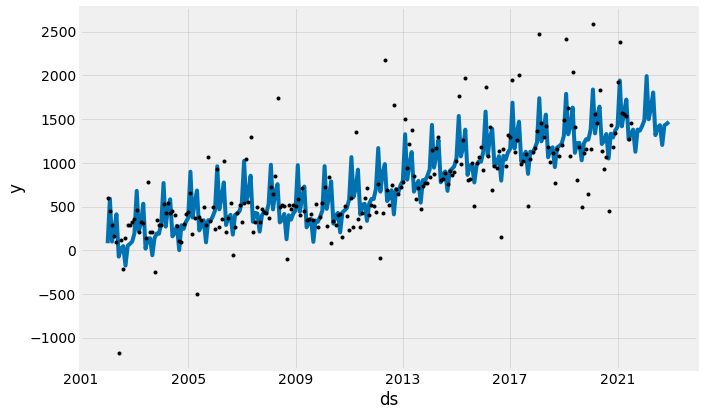

In [5]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

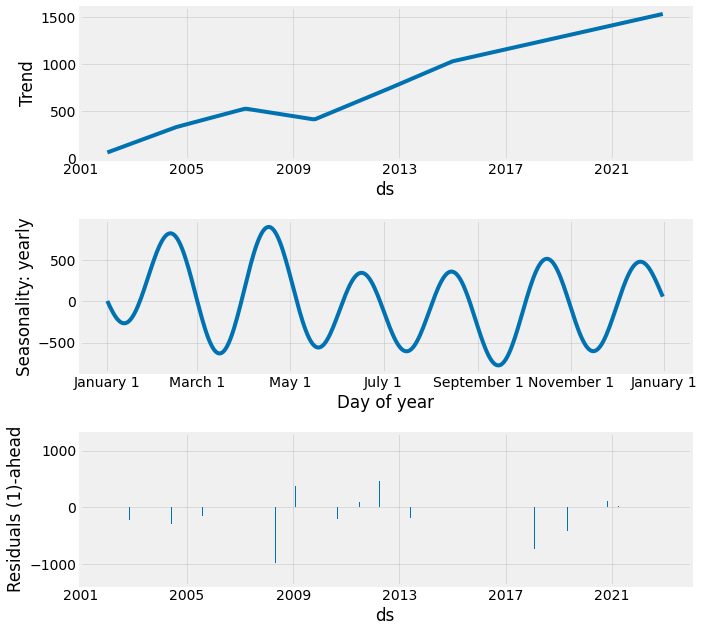

In [6]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

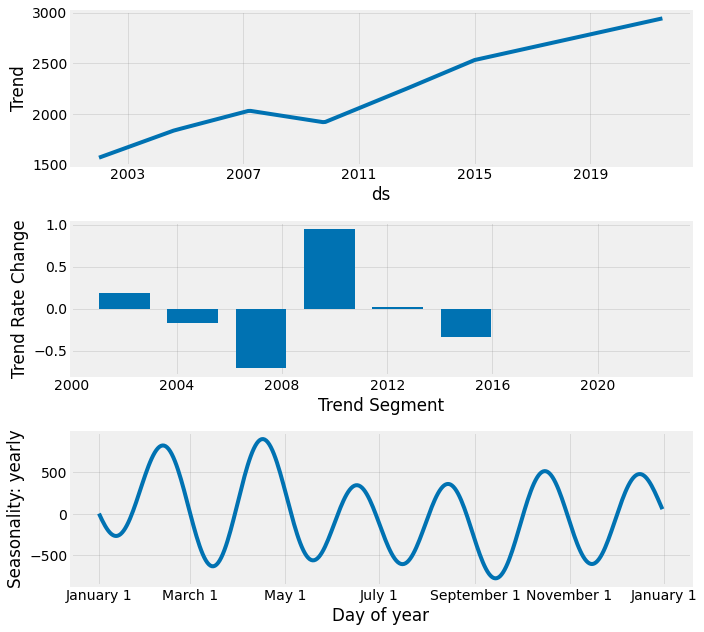

In [7]:
fig_param = nprophet.plot_parameters()

In [8]:
iepsb_r=forecast.yhat1

### 3.2 IEPS Cervezas

In [9]:
iepsc=df[['fecha','ieps_cervezas']]
iepsc=iepsc.dropna()
iepsc.columns=['ds','y']
iepsc.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [10]:
nprophet = NeuralProphet()
metrics = nprophet.fit(iepsc, freq="MS")
future = nprophet.make_future_dataframe(iepsc, 
                                        periods = 17, 
                                        n_historic_predictions=len(iepsc)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 136


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[136/136]: 100%|██████████| 136/136 [00:06<00:00, 21.01it/s, SmoothL1Loss=0.00397, MAE=200, RegLoss=0] 


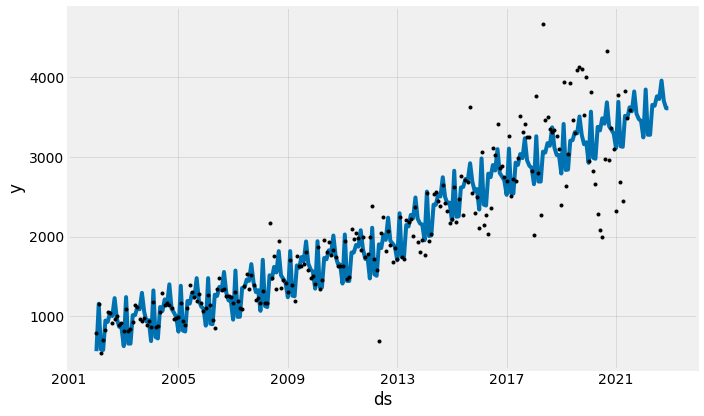

In [11]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

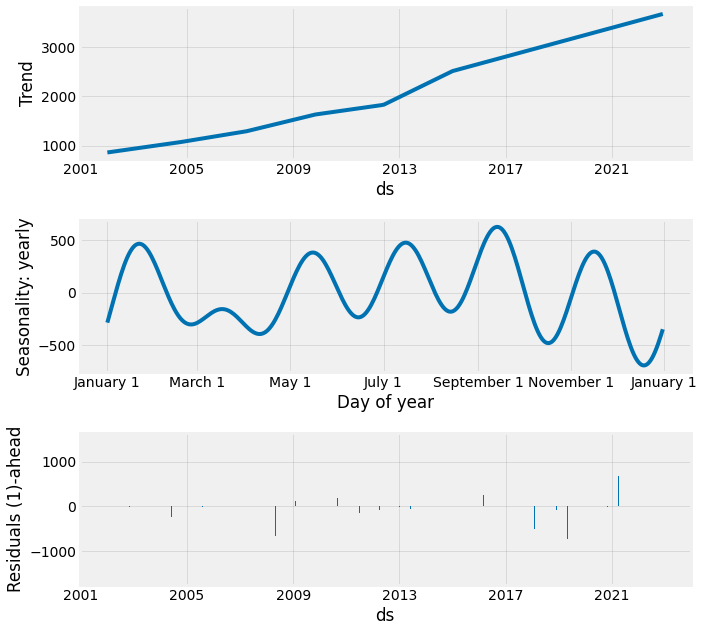

In [12]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

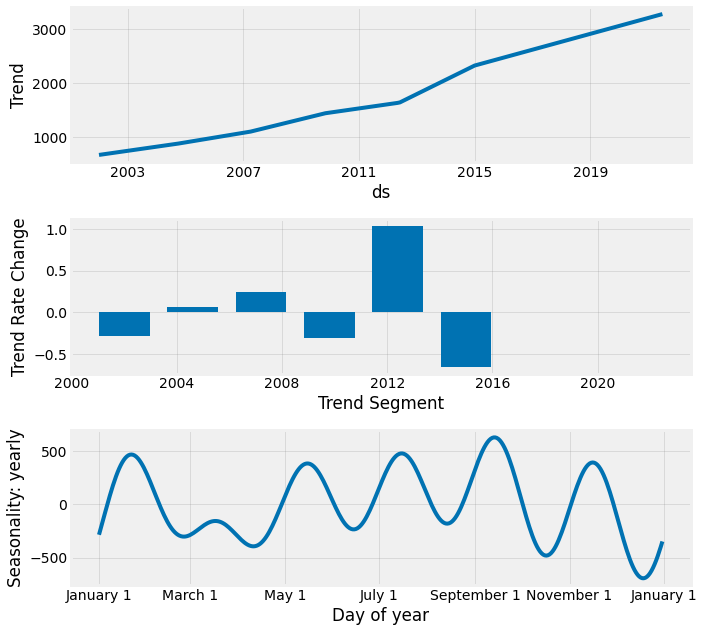

In [13]:
fig_param = nprophet.plot_parameters()

In [14]:
iepsc_r=forecast.yhat1

### 3.3 IEPS Gasolinas

In [15]:
iepsg=df[['fecha','ieps_gas']]
iepsg=iepsg.dropna()
iepsg.columns=['ds','y']
iepsg.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [16]:
nprophet = NeuralProphet(seasonality_mode='additive')
metrics = nprophet.fit(iepsg, freq="MS")
future = nprophet.make_future_dataframe(iepsg, 
                                        periods = 17, 
                                        n_historic_predictions=len(iepsg)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 202


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:12<00:00, 16.55it/s, SmoothL1Loss=0.00916, MAE=2.78e+3, RegLoss=0]


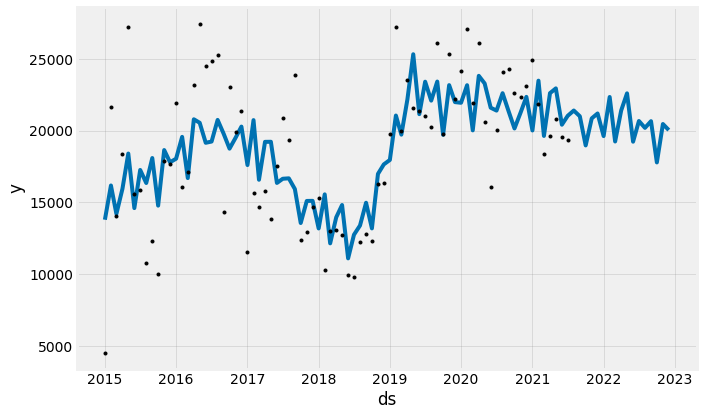

In [17]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

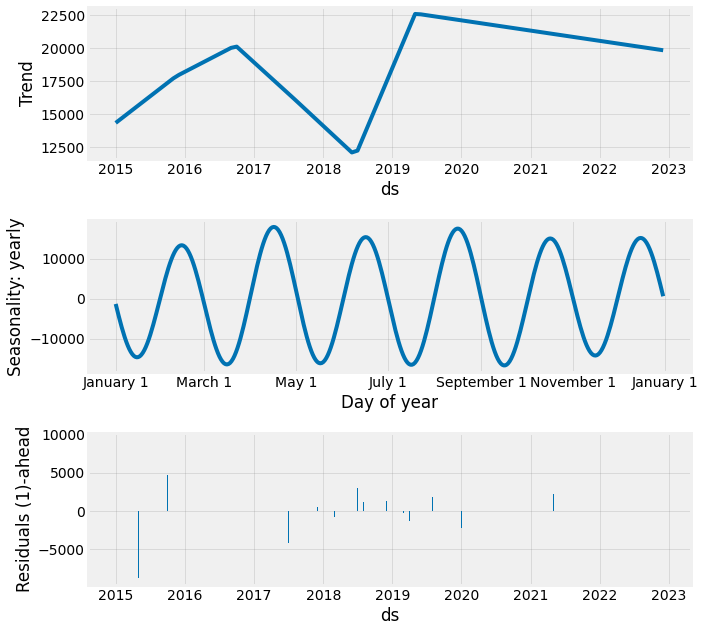

In [18]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

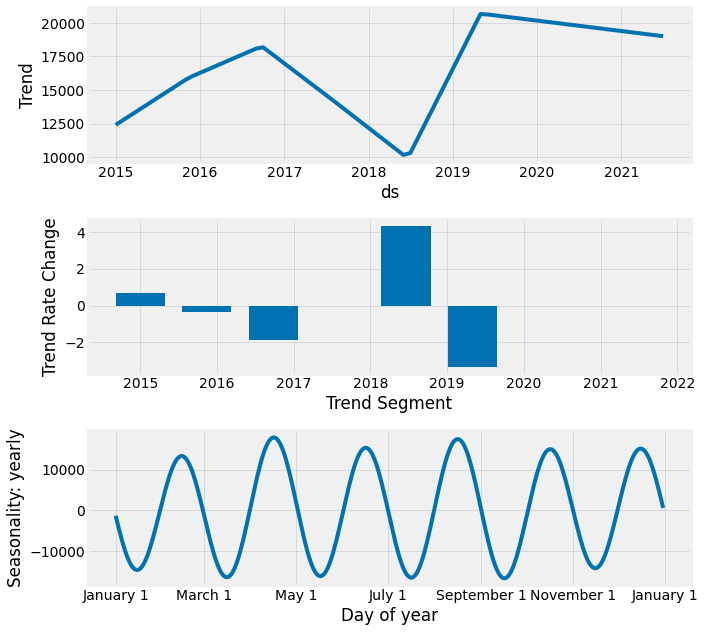

In [19]:
fig_param = nprophet.plot_parameters()

In [20]:
iepsg_r=forecast.yhat1

### 3.4 IEPS Tabacos

In [21]:
iepst=df[['fecha','ieps_tabacos']]
iepst=iepst.dropna()
iepst.columns=['ds','y']
iepst.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [22]:
nprophet = NeuralProphet()
metrics = nprophet.fit(iepst, freq="MS")
future = nprophet.make_future_dataframe(iepst, 
                                        periods = 17, 
                                        n_historic_predictions=len(iepst)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 136


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[136/136]: 100%|██████████| 136/136 [00:06<00:00, 20.42it/s, SmoothL1Loss=0.0268, MAE=1.16e+3, RegLoss=0]


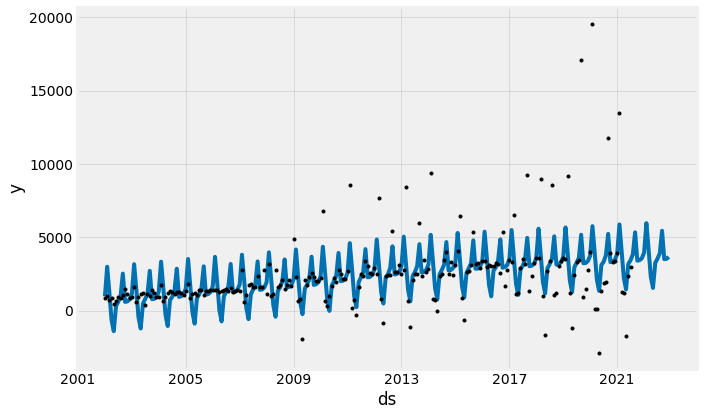

In [23]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

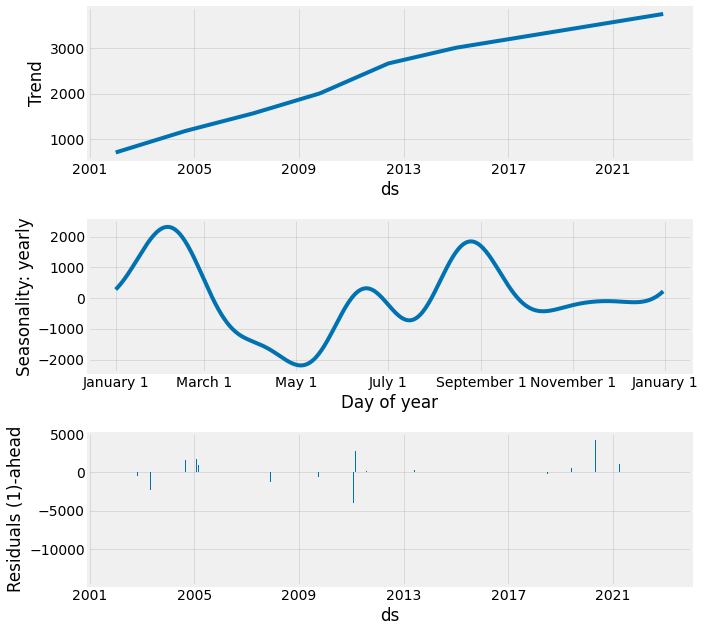

In [24]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

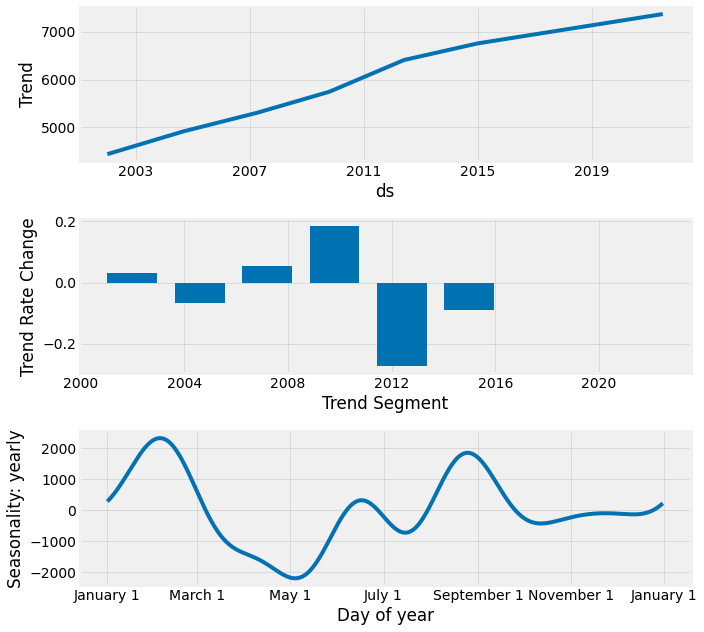

In [25]:
fig_param = nprophet.plot_parameters()

In [26]:
iepst_r=forecast.yhat1

### 3.5 IEPS Bebidas Saborizadas

In [27]:
iepsbs=df[['fecha','ieps_bebidassab']]
iepsbs=iepsbs.dropna()
iepsbs.columns=['ds','y']
iepsbs.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [28]:
nprophet = NeuralProphet(seasonality_mode='multiplicative')
metrics = nprophet.fit(iepsbs, freq="MS")
future = nprophet.make_future_dataframe(iepsbs, 
                                        periods = 17, 
                                        n_historic_predictions=len(iepsbs)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 179


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-02
Epoch[179/179]: 100%|██████████| 179/179 [00:12<00:00, 14.02it/s, SmoothL1Loss=0.00631, MAE=155, RegLoss=0]


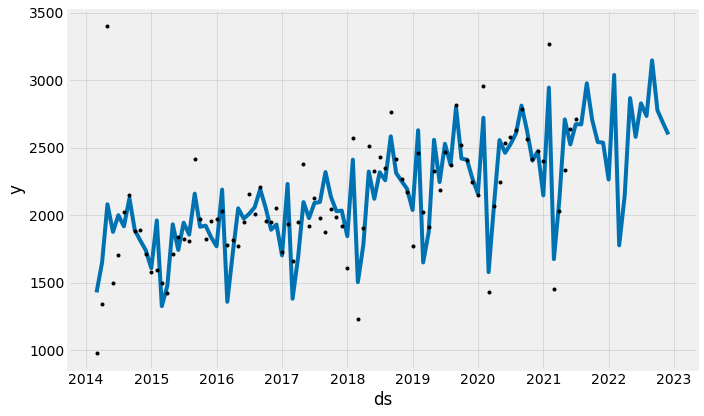

In [29]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

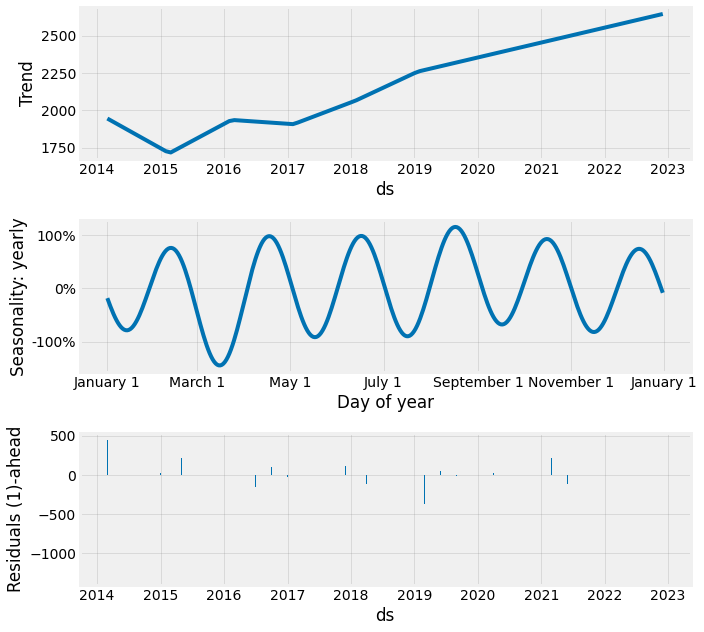

In [30]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

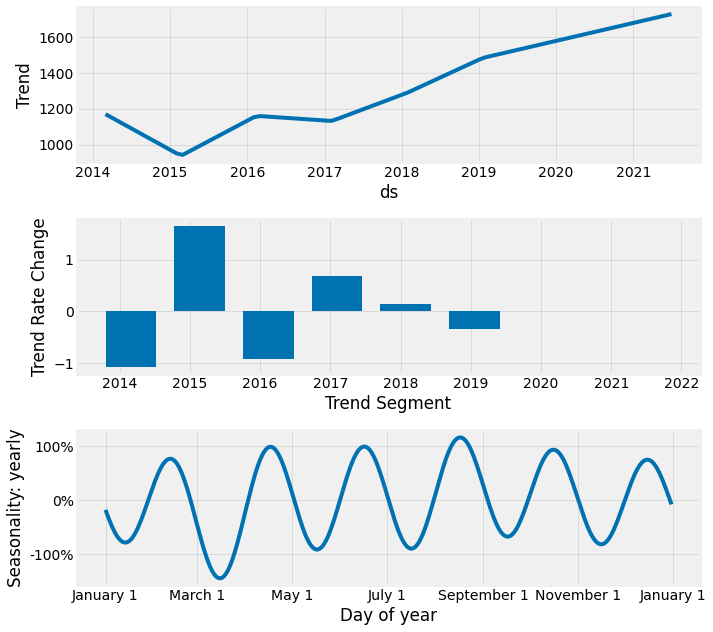

In [31]:
fig_param = nprophet.plot_parameters()

In [32]:
iepsbs_r=forecast.yhat1

### 3.6 IEPS Alimentos

In [33]:
iepsa=df[['fecha','ieps_alimentos']]
iepsa=iepsa.dropna()
iepsa.columns=['ds','y']
iepsa.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [34]:
nprophet = NeuralProphet(seasonality_mode='additive')
metrics = nprophet.fit(iepsa, freq="MS")
future = nprophet.make_future_dataframe(iepsa, 
                                        periods = 17, 
                                        n_historic_predictions=len(iepsa)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 179


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-03
Epoch[179/179]: 100%|██████████| 179/179 [00:12<00:00, 13.98it/s, SmoothL1Loss=0.00675, MAE=144, RegLoss=0]


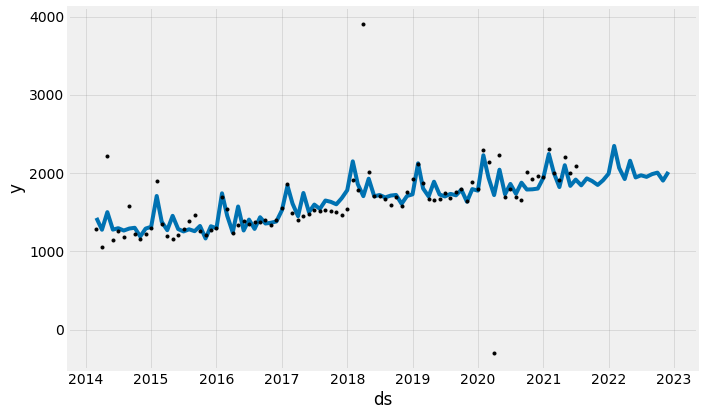

In [35]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

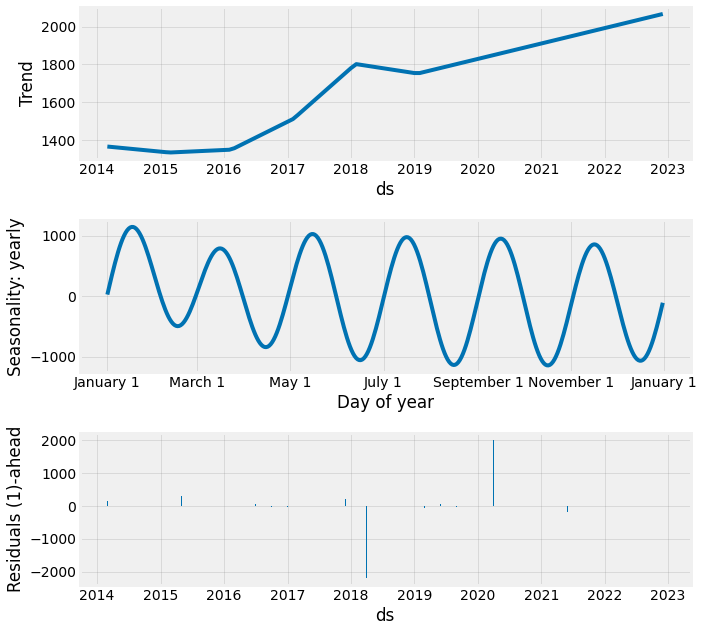

In [36]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

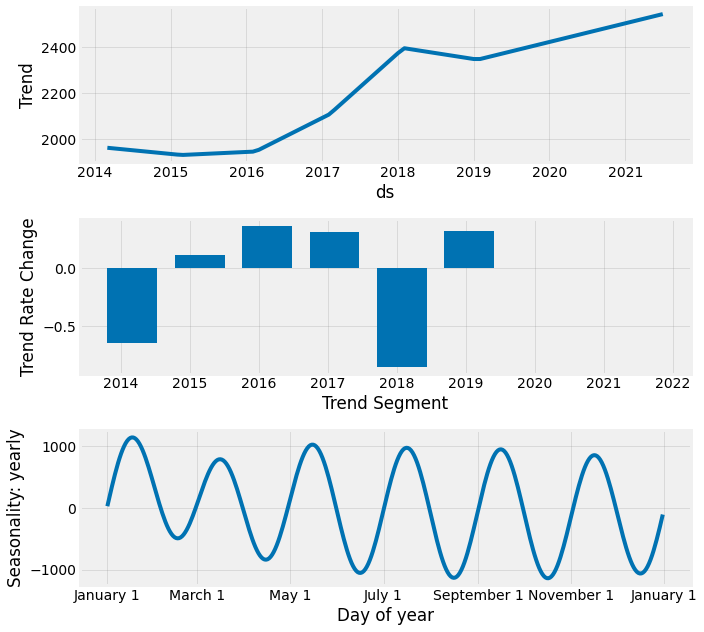

In [37]:
fig_param = nprophet.plot_parameters()

In [38]:
iepsa_r=forecast.yhat1

### 3.7 Impuesto a la Importación

In [39]:
importacion=df[['fecha','importacion']]
importacion=importacion.dropna()
importacion.columns=['ds','y']
importacion.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [40]:
nprophet = NeuralProphet()
metrics = nprophet.fit(importacion, freq="MS")
future = nprophet.make_future_dataframe(importacion, 
                                        periods = 17, 
                                        n_historic_predictions=len(importacion)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 136


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-03
Epoch[136/136]: 100%|██████████| 136/136 [00:07<00:00, 18.65it/s, SmoothL1Loss=0.00525, MAE=367, RegLoss=0] 


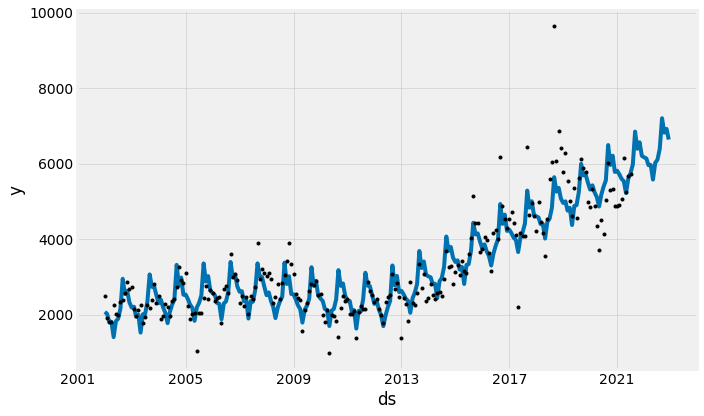

In [41]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

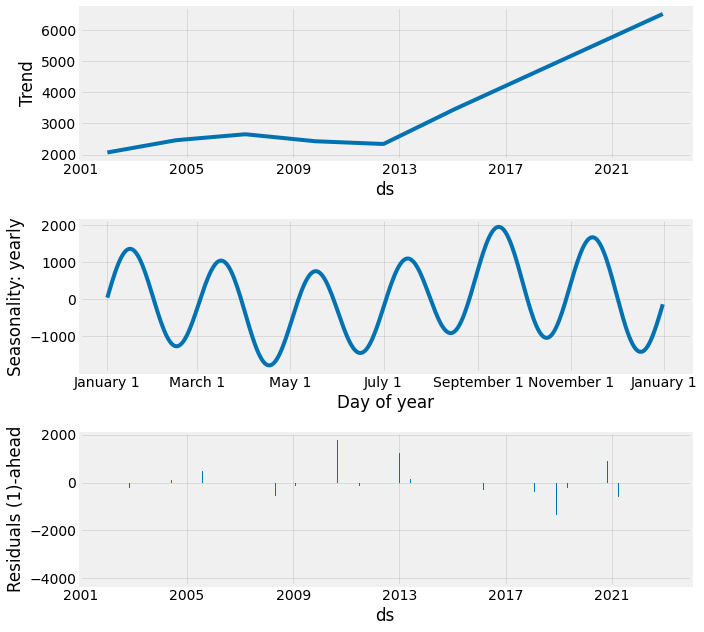

In [42]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

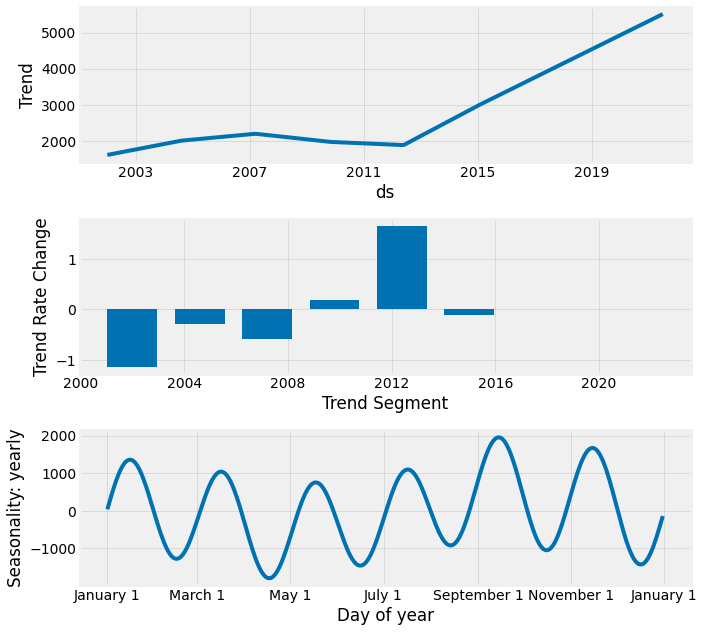

In [43]:
fig_param = nprophet.plot_parameters()

In [44]:
importacion_r=forecast.yhat1

### 3.8 RFP Petroleros

In [45]:
petr=df[['fecha','rfp_petroleros']]
petr=petr.dropna()
petr.columns=['ds','y']
petr.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [46]:
nprophet = NeuralProphet(seasonality_mode='multiplicative')
metrics = nprophet.fit(petr, freq="MS")
future = nprophet.make_future_dataframe(petr, 
                                        periods = 17, 
                                        n_historic_predictions=len(petr)
                                       )

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 136


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[136/136]: 100%|██████████| 136/136 [00:07<00:00, 18.81it/s, SmoothL1Loss=0.00905, MAE=8.95e+3, RegLoss=0]


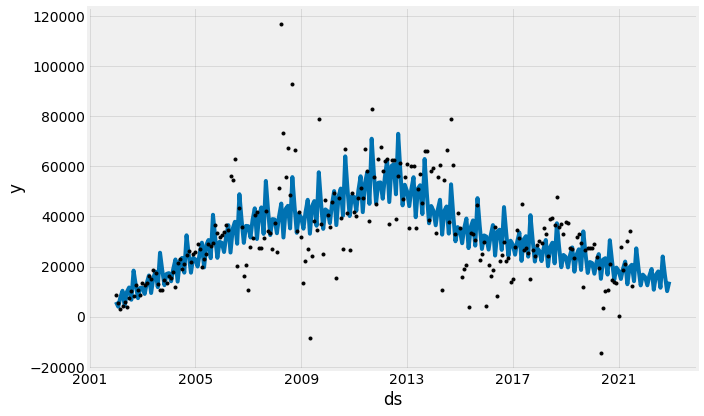

In [47]:
forecast = nprophet.predict(future)
forecasts_plot = nprophet.plot(forecast)

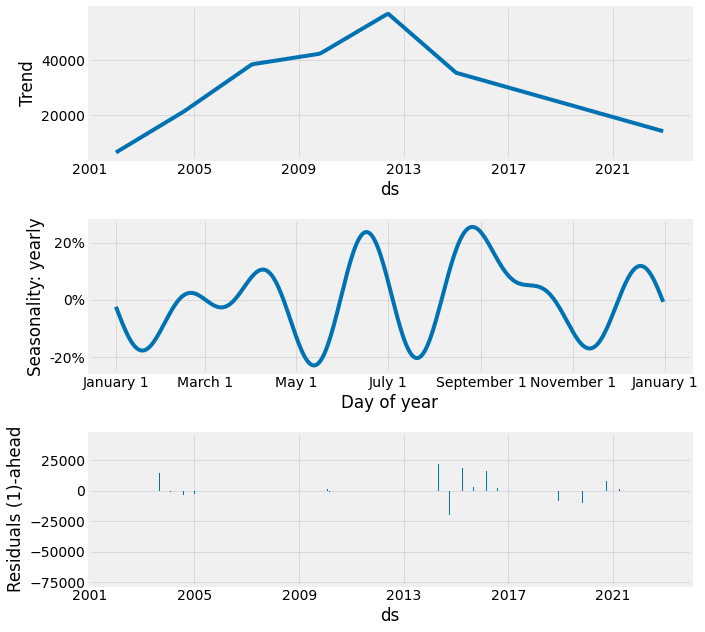

In [48]:
fig_comp = nprophet.plot_components(forecast, residuals=True)

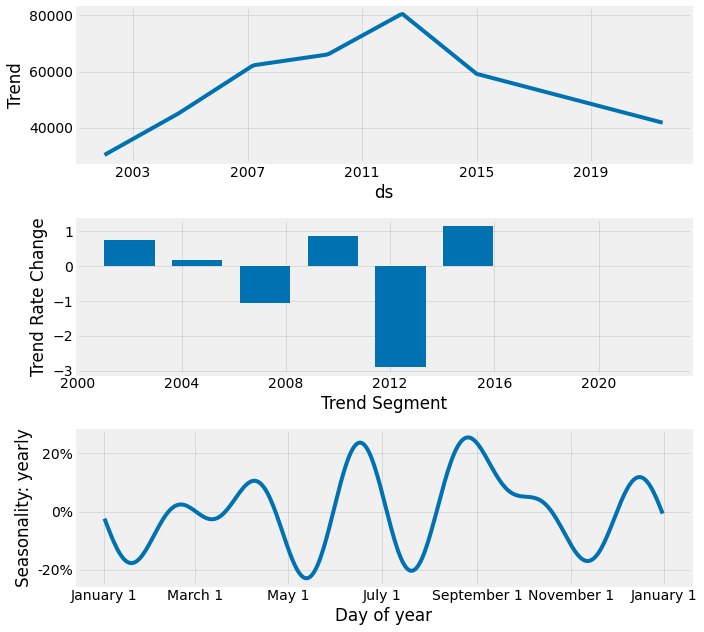

In [49]:
fig_param = nprophet.plot_parameters()

In [50]:
petr_r=forecast.yhat1
np_men=pd.DataFrame({'ieps_gas': iepsg_r,
    'ieps_tabacos': iepst_r,
    'ieps_bebidas': iepsb_r,
    'ieps_cervezas': iepsc_r,
    'ieps_bebidassab': iepsbs_r,
    'ieps_alimentos': iepsa_r,
    'importacion': importacion_r,
    'rfp_petroleros': petr_r
})
np_men.tail()

,ieps_gas,ieps_tabacos,ieps_bebidas,ieps_cervezas,ieps_bebidassab,ieps_alimentos,importacion,rfp_petroleros
247,NaN,3897.899658,1431.443604,3726.977539,NaN,NaN,6392.888672,11590.394531
248,NaN,5437.014648,1205.087402,3957.842041,NaN,NaN,7202.621582,24048.066406
249,NaN,3501.541260,1428.270996,3703.803467,NaN,NaN,6822.098145,16686.527344
250,NaN,3525.431396,1447.366699,3610.397461,NaN,NaN,6920.458008,10243.957031
251,NaN,3654.378662,1470.103027,3610.724609,NaN,NaN,6637.967773,14009.375000


In [51]:
np_men.to_csv('neural_prophet_mensuales.csv')

## 4. Series Trimestrales

Ahora pasaré a las series trimestrales. Aquí sí realicé algunos ajustes al modelo base, que incluyeron agregar mis variables explícativas que determiné en la [parte 1]() de esta carrera.

### 4.1 Impuesto Sobre la Renta, ISR

En el caso de esta serie, las variables explícativas que utilizare son el Producto Interno Bruto (PIB) y una variable dummy para señalar cuando ocurrió una reforma a Ley de este impuesto. Para agregar estas variables explícativas tuve que tener por un lado el bloque hasta las observaciones que tengo, y por otro (cortando los datos donde aún no tengo observaciones):

In [52]:
df = pd.read_csv('202108trimestrales.csv', sep=',', parse_dates=['fecha'], index_col='fecha', encoding = 'utf-8')
df['fecha']=df.index
df.tail()

,ano,mes,dia,fechas,pib_real,pib_reale4,IPI,rfp_neta,isr,iva,rfp_real,isr_real,iva_real,tasa iva,reformaisr,covid,fecha
fecha,,,,,,,,,,,,,,,,,
2021-10-01,2021,10,1,2021/04,18725631,4681407.77,143.74,NaN,NaN,NaN,NaN,NaN,NaN,16,1,0,2021-10-01
2022-01-01,2022,1,1,2022/01 /r1,18021273,4505318.26,149.32,NaN,NaN,NaN,NaN,NaN,NaN,16,1,0,2022-01-01
2022-04-01,2022,4,1,2022/02,18331787,4582946.70,148.64,NaN,NaN,NaN,NaN,NaN,NaN,16,1,0,2022-04-01
2022-07-01,2022,7,1,2022/03,18308165,4577041.25,149.00,NaN,NaN,NaN,NaN,NaN,NaN,16,1,0,2022-07-01
2022-10-01,2022,10,1,2022/04,19118869,4779717.33,149.63,NaN,NaN,NaN,NaN,NaN,NaN,16,1,0,2022-10-01


In [53]:
isr=df[['fecha','isr_real','pib_reale4','reformaisr']]
isr.columns=['ds','y','pib','reformaisr']
isr.drop(isr.tail(6).index,inplace=True)
isr.tail(7)

,ds,y,pib,reformaisr
fecha,,,,
2019-10-01,2019-10-01,258318.2000,4712688.75,1
2020-01-01,2020-01-01,331710.3000,4503265.18,1
2020-04-01,2020-04-01,241585.6000,3753879.82,1
2020-07-01,2020-07-01,199792.8000,4192719.78,1
2020-10-01,2020-10-01,261205.8000,4501353.62,1
2021-01-01,2021-01-01,310206.7000,4340383.68,1
2021-04-01,2021-04-01,246902.4148,4440839.82,1


Y en otra base, tengo que colocar las variables explicativas "a futuro". Para el PIB utilicé las proyecciones del Banco de México y supuse que no habrá otra reforma importante del ISR.

In [54]:
x=df[['pib_reale4','reformaisr']]
x.columns=['pib','reformaisr']
x.drop(x.head(78).index,inplace=True)
x.tail()

,pib,reformaisr
fecha,,
2021-10-01,4681407.77,1
2022-01-01,4505318.26,1
2022-04-01,4582946.70,1
2022-07-01,4577041.25,1
2022-10-01,4779717.33,1


In [55]:
x2=df[['pib_reale4','reformaisr']]
x2.columns=['pib','reformaisr']
x2.tail()

,pib,reformaisr
fecha,,
2021-10-01,4681407.77,1
2022-01-01,4505318.26,1
2022-04-01,4582946.70,1
2022-07-01,4577041.25,1
2022-10-01,4779717.33,1


Esto es un poco diferente a *Prophet*, pues éste automáticamente hace la estimación en el rango donde tengo observaciones y expande su horizonte hasta donde tiene variables explicativas. En cambio, *Neural Prophet* interpreta los huecos como observaciones pérdidas ("missing values") y no hace este ajuste. Inclusive en la documentación de *Neural Prophet* el comando para agregar este tipo de variables explicativas se llama [*add_future_regressor*](http://neuralprophet.com/model/future-regressors/).

In [56]:
nprophet1 = NeuralProphet(seasonality_mode='multiplicative')
nprophet1.add_future_regressor(name='pib')
nprophet1.add_future_regressor(name='reformaisr')
metrics = nprophet1.fit(isr, freq="QS")

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 205


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[205/205]: 100%|██████████| 205/205 [00:14<00:00, 14.09it/s, SmoothL1Loss=0.0034, MAE=1.6e+4, RegLoss=0]  


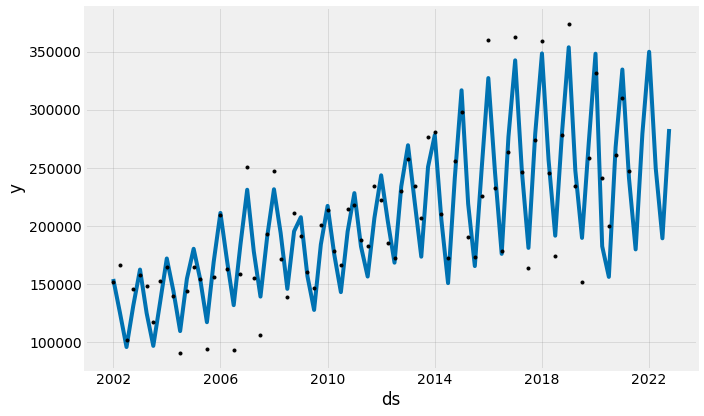

In [57]:
future = nprophet1.make_future_dataframe(df=isr, 
                                        periods = 6,
                                        regressors_df=x,
                                        n_historic_predictions=len(isr)                                        
                                       )
forecast = nprophet1.predict(future)
forecasts_plot = nprophet1.plot(forecast)

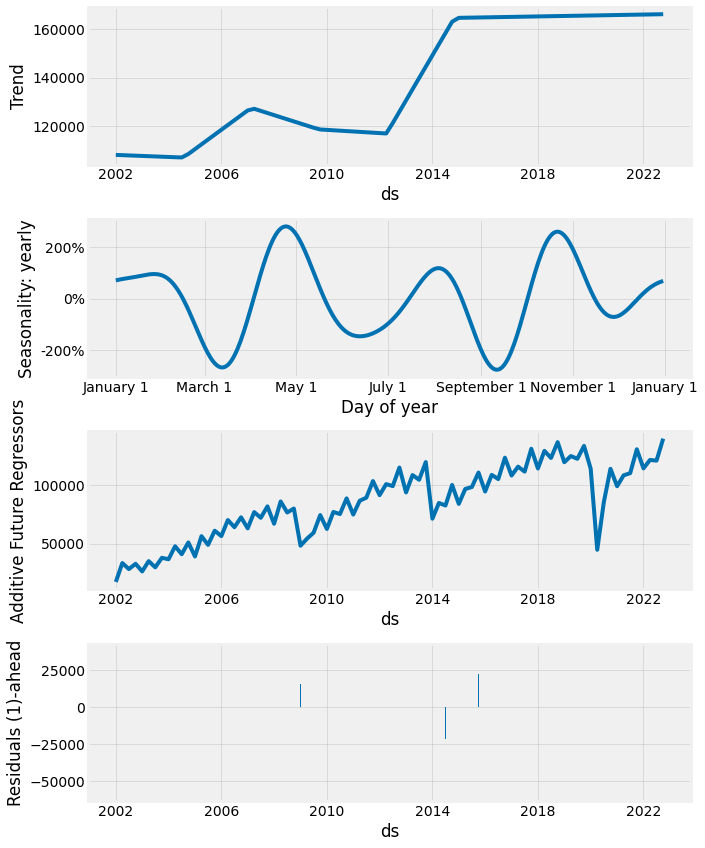

In [58]:
fig_comp = nprophet1.plot_components(forecast, residuals=True)

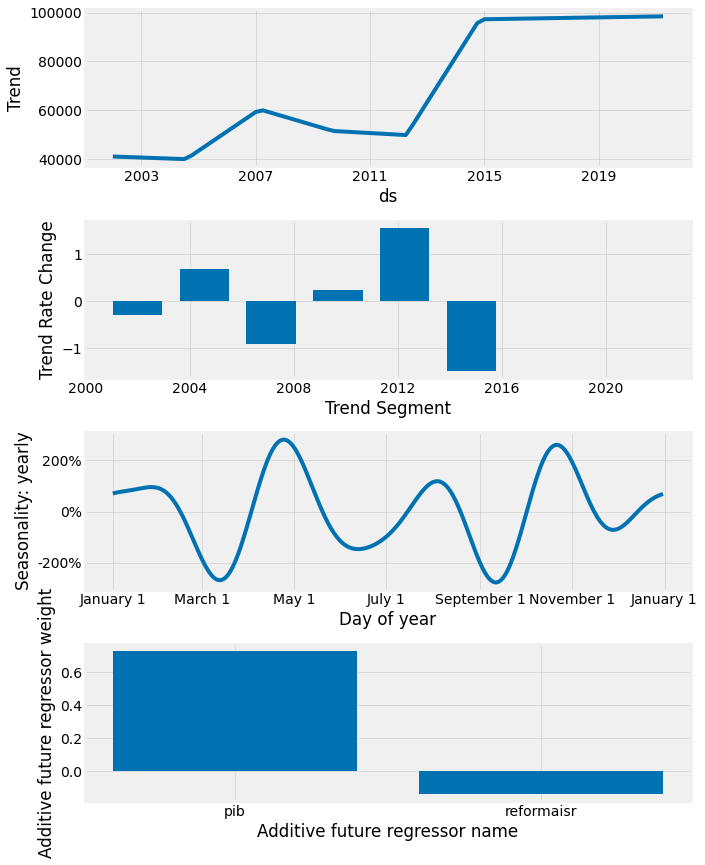

In [59]:
fig_param = nprophet1.plot_parameters()

In [60]:
forecast.to_csv('neural_prophet_isr.csv')

### 5.2 IVA

In [68]:
iva=df[['fecha','iva_real','pib_reale4','tasa iva']]
iva.columns=['ds','y','pib','tasa']
iva.drop(iva.tail(6).index,inplace=True)
iva.tail()

,ds,y,pib,tasa
fecha,,,,
2020-04-01,2020-04-01,145341.400,3753879.82,16
2020-07-01,2020-07-01,165925.900,4192719.78,16
2020-10-01,2020-10-01,220389.000,4501353.62,16
2021-01-01,2021-01-01,180536.600,4340383.68,16
2021-04-01,2021-04-01,198732.452,4440839.82,16


In [69]:
y=df[['pib_reale4','tasa iva']]
y.columns=['pib','tasa']
y.drop(y.head(78).index,inplace=True)
y.tail()

,pib,tasa
fecha,,
2021-10-01,4681407.77,16
2022-01-01,4505318.26,16
2022-04-01,4582946.70,16
2022-07-01,4577041.25,16
2022-10-01,4779717.33,16


In [70]:
nprophet2 = NeuralProphet(seasonality_mode='additive')
nprophet2.add_future_regressor(name='pib')
nprophet2.add_future_regressor(name='tasa')
metrics = nprophet2.fit(iva, freq="QS")

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 205


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E-02
Epoch[205/205]: 100%|██████████| 205/205 [00:13<00:00, 14.74it/s, SmoothL1Loss=0.00291, MAE=8.4e+3, RegLoss=0] 


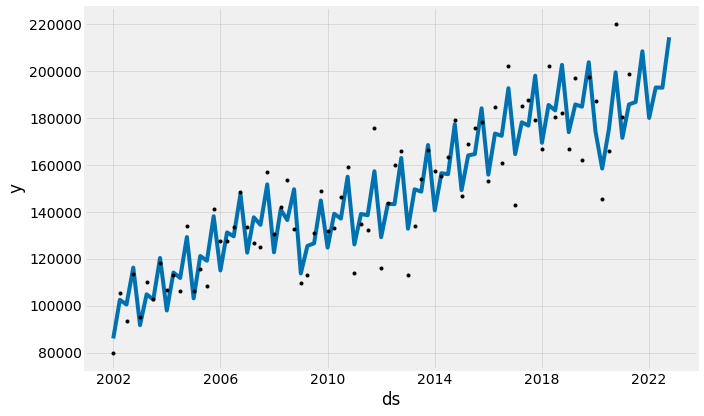

In [71]:
future = nprophet2.make_future_dataframe(df=iva, 
                                        periods = 6,
                                        regressors_df=y,
                                        n_historic_predictions=len(iva)                                        
                                       )
forecast = nprophet2.predict(future)
forecasts_plot = nprophet2.plot(forecast)

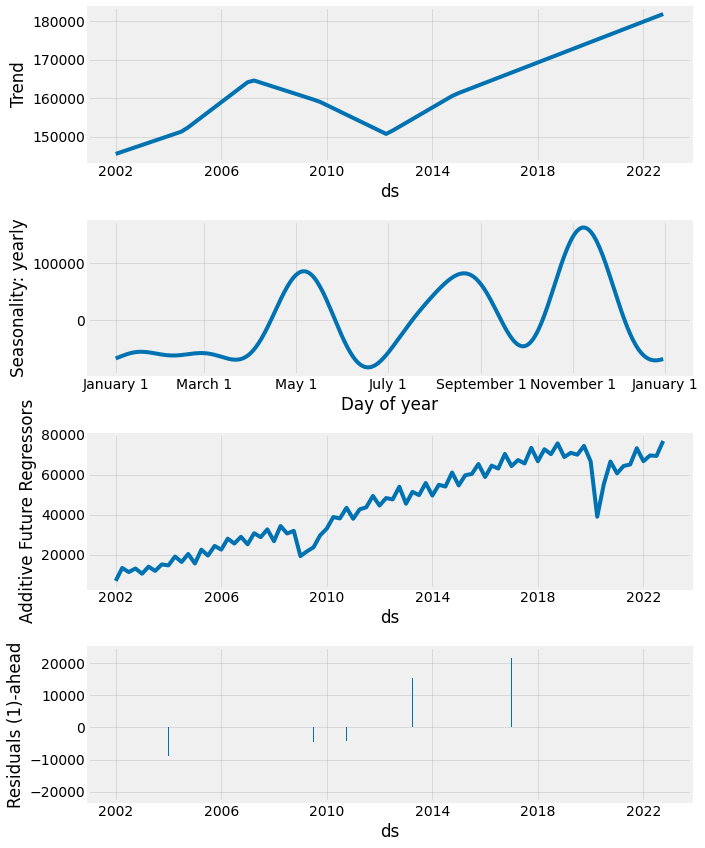

In [72]:
fig_comp = nprophet2.plot_components(forecast, residuals=True)

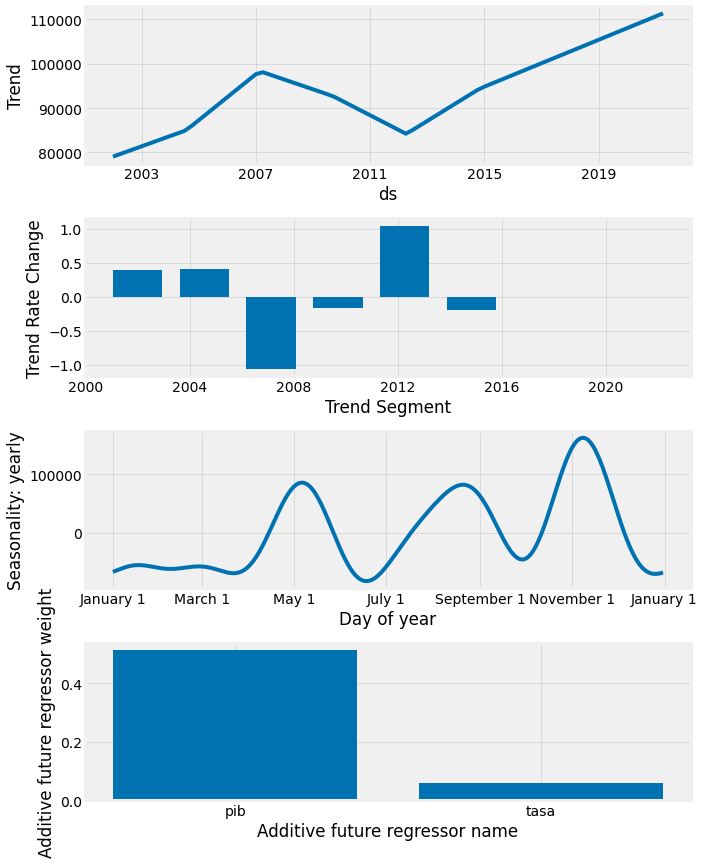

In [73]:
fig_param = nprophet2.plot_parameters()

In [74]:
forecast.to_csv('neural_prophet_iva.csv')